In [ ]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from nselib import capital_market
import plotly.graph_objects as go

# PROBLEM 

- SYMBOL 
- RANGE - FROM_DATE TO TO_DATE,
- FILTER : DAILY ,WEEK,ALGO 

X: TIME , Y: DeliverableQty

EXAMPLE :

symbol="INFY"
range = "01-06-2024" to "01-07-2024",
suppose:
date          DeliverableQty      weekdays

01-06-2024          1               Thursday
02-06-2024          2               Friday
05-06-2024          3               Monday
06-06-2024          4               Tuseday
07-06-2024          5               Wednesday
08-06-2024          6               Thursday
09-06-2024          7               Friday 
....
- for daily just plot date as x and  DeliverableQty as y 
- for week divide in batch 

like 
in 

week                                                                           DeliverableQty

WEEK -1   includes: {01-06-2024 ,02-06-2024}                                   DeliverableQty=3 
WEEK -2   includes: {05-06-2024 ,06-06-2024,07-06-2024,08-06-2024,09-06-2024}  DeliverableQty=3+4+5+6+7

-now plot week as x and DeliverableQty as y


# FOR MONTH
Month -1 includes :{ start _date to end of  month }   sum of DeliverableQty in this range
Month -2 includes : {new_month starting date presents in data to end of month } then sum of DeliverableQty in this range
....so on

-now plot month as x and DeliverableQty as y


same for 2 MONTH ,3 MONTH,...


# FOR DAILY

In [26]:
def give_strctured(dataFrame):
   DeliverableQty_numeric=[]
   
   df=dataFrame.copy()
   for i in (df["DeliverableQty"].str.split(",")):
      DeliverableQty_numeric.append("".join(i))
   df["DeliverableQty_Numeric"]=DeliverableQty_numeric
   df["DeliverableQty_Numeric"]=df["DeliverableQty_Numeric"].astype(np.int64)
   df["Date_time"]=pd.to_datetime(dataFrame["Date"],format="%d-%b-%Y")
   df["weekday"]=list(map(lambda x:x.day_name(),df["Date_time"]))

   df=df[["Symbol","Date_time","DeliverableQty_Numeric","weekday"]]

   return df

In [14]:
df=capital_market.price_volume_and_deliverable_position_data("INFY",period='1M')


c:\Users\Jainam Harsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\nselib\capital_market\capital_market_data.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  nse_df = pd.concat([nse_df, data_df], ignore_index=True)


In [15]:
df

,Symbol,Series,Date,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,%DlyQttoTradedQty
0,INFY,EQ,17-May-2024,"1,453.35","1,457.00","1,457.00","1,439.25","1,445.00","1,444.30","1,445.43","75,42,860","10,90,26,58,147.90","1,70,369","54,28,897",71.97
1,INFY,EQ,18-May-2024,"1,444.30","1,445.00","1,450.00","1,442.00","1,444.30","1,443.65","1,445.13","3,18,277","45,99,52,847.90","13,136","2,01,491",63.31
2,INFY,EQ,21-May-2024,"1,443.65","1,430.00","1,444.70","1,428.40","1,435.55","1,434.15","1,435.51","67,52,663","9,69,35,16,261.30","2,04,780","50,85,153",75.31
3,INFY,EQ,22-May-2024,"1,434.15","1,428.75","1,459.95","1,428.00","1,454.20","1,454.80","1,450.92","71,73,285","10,40,78,81,536.70","2,26,692","50,66,600",70.63
4,INFY,EQ,23-May-2024,"1,454.80","1,454.70","1,478.15","1,450.00","1,471.05","1,472.40","1,469.37","86,41,428","12,69,74,20,682.20","3,00,489","46,64,587",53.98
5,INFY,EQ,24-May-2024,"1,472.40","1,468.25","1,475.50","1,460.00","1,462.60","1,465.10","1,467.29","52,77,938","7,74,42,83,255.40","1,73,496","35,35,961",67.00
6,INFY,EQ,27-May-2024,"1,465.10","1,471.85","1,479.60","1,460.25","1,471.00","1,471.35","1,470.82","58,21,844","8,56,28,95,961.60","2,09,335","40,82,361",70.12
7,INFY,EQ,28-May-2024,"1,471.35","1,475.50","1,476.00","1,460.30","1,463.00","1,467.05","1,471.00","61,86,922","9,10,09,58,068.45","1,78,525","47,23,117",76.34
8,INFY,EQ,29-May-2024,"1,467.05","1,465.40","1,465.50","1,450.00","1,455.00","1,450.95","1,454.96","74,01,634","10,76,90,91,064.90","2,45,143","54,85,547",74.11
9,INFY,EQ,30-May-2024,"1,450.95","1,442.80","1,449.85","1,421.55","1,434.95","1,427.45","1,431.84","96,63,150","13,83,61,20,754.00","2,69,401","58,48,165",60.52


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol               21 non-null     object 
 1   Series               21 non-null     object 
 2   Date                 21 non-null     object 
 3   PrevClose            21 non-null     object 
 4   OpenPrice            21 non-null     object 
 5   HighPrice            21 non-null     object 
 6   LowPrice             21 non-null     object 
 7   LastPrice            21 non-null     object 
 8   ClosePrice           21 non-null     object 
 9   AveragePrice         21 non-null     object 
 10  TotalTradedQuantity  21 non-null     object 
 11  TurnoverInRs         21 non-null     object 
 12  No.ofTrades          21 non-null     object 
 13  DeliverableQty       21 non-null     object 
 14  %DlyQttoTradedQty    21 non-null     float64
dtypes: float64(1), object(14)
memory usage: 2.

In [27]:
new_df=give_strctured(df)

In [28]:
new_df

,Symbol,Date_time,DeliverableQty_Numeric,weekday
0,INFY,2024-05-17,5428897,Friday
1,INFY,2024-05-18,201491,Saturday
2,INFY,2024-05-21,5085153,Tuesday
3,INFY,2024-05-22,5066600,Wednesday
4,INFY,2024-05-23,4664587,Thursday
5,INFY,2024-05-24,3535961,Friday
6,INFY,2024-05-27,4082361,Monday
7,INFY,2024-05-28,4723117,Tuesday
8,INFY,2024-05-29,5485547,Wednesday
9,INFY,2024-05-30,5848165,Thursday


In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  21 non-null     object        
 1   Date_time               21 non-null     datetime64[ns]
 2   DeliverableQty_Numeric  21 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 636.0+ bytes


In [38]:
x=new_df["Date_time"]
y=new_df["DeliverableQty_Numeric"]

# FOR DAILY

In [39]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers', name='Deliverable Quantity'))

fig.update_layout(
    title='Line Plot of Deliverable Quantity Over Time',
    xaxis_title='Date',
    yaxis_title='Deliverable Quantity',
    template='plotly',
    width=800
)


fig.show()

# FOR WEEK

In [29]:
def get_week(dataFrame):
    week_dict={}
    week=1
    sum=0
    for i in range(dataFrame.shape[0]):
        date=dataFrame.loc[i,"weekday"]
        val=dataFrame.loc[i,"DeliverableQty_Numeric"]

        if (date=="Friday"):
            sum+=val
            week_dict.update({f"week{week}":sum})
            week+=1
            sum=0
        elif (date=="Saturday"):
            continue
        else:
            sum+=val
    return (list(week_dict.keys()),list(week_dict.values()))

In [33]:
x,y=get_week(new_df)
print(x)

['week1', 'week2', 'week3', 'week4', 'week5']


<Axes: >

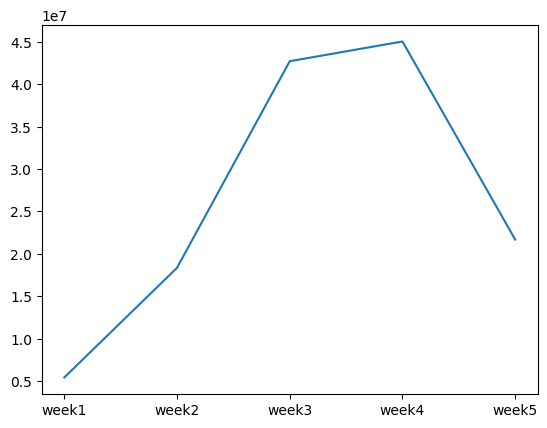

In [34]:
sns.lineplot(x=x,y=y)

In [37]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=x, y=y, mode='lines+markers', name='Deliverable Quantity'))

fig.update_layout(
    title='Line Plot of Deliverable Quantity Over Time',
    xaxis_title='Date',
    yaxis_title='Deliverable Quantity',
    template='plotly',
    width=800
)


fig.show()